% ADAP-ML Report


# Statistics

T-test


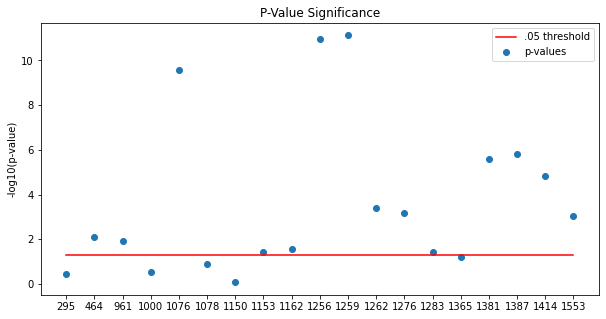

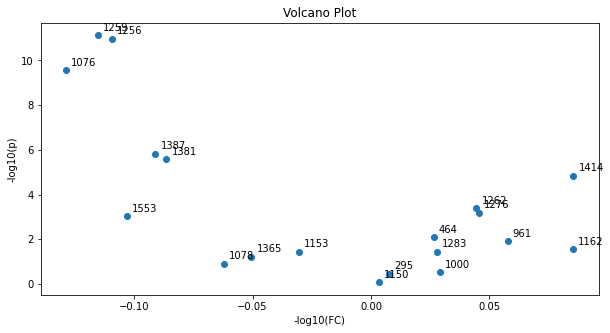

In [1]:
import modules.adapml_data as adapml_data
import modules.adapml_classification as adapml_classification
import modules.adapml_clustering as adapml_clustering
import modules.adapml_chemometrics as adapml_chemometrics
import modules.adapml_statistics as adapml_statistics
import numpy as np
import modules.loadTestData as load_data
import sklearn.preprocessing as pre
from sklearn.cross_decomposition import PLSRegression as PLS
from matplotlib import pyplot as plt
from sklearn import cluster as clst
from scipy.cluster.hierarchy import dendrogram

import os


reldir = os.getcwd()
path_to_data = os.path.join(reldir, '..', 'data', 'SCLC_study_output_filtered_2.csv')
path_to_resp = os.path.join(reldir, '..', 'data', 'SCLC_study_responses_2.csv')

data = adapml_data.DataImport(path_to_data)
data2 = adapml_data.DataImport(path_to_data)

response1D = adapml_data.DataImport.getResponse(path_to_resp)
response2D = adapml_data.DataImport.getDummyResponse(response1D)

variables = data.getVariableNames()
samples = data.getSampleNames()

t_test = adapml_statistics.Statistics(data.data, 'anova', response1D)
t_test.plot_logp_values(variables)
t_test.plot_volcano_t(variables)




# Dimension-Reduction

PCA, LDA


PCA Projections
Projections of data into latent space.
Data is colored by response


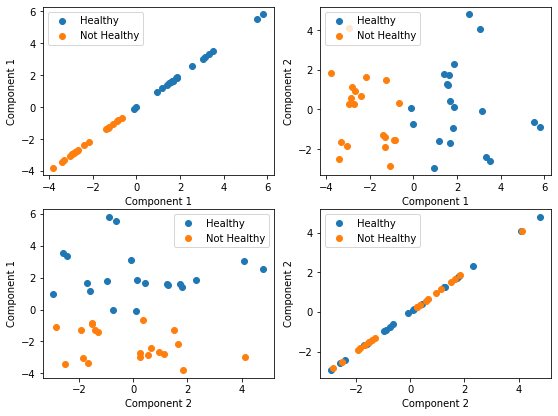

LDA Projections
Projections of data into latent space.
Data is colored by response


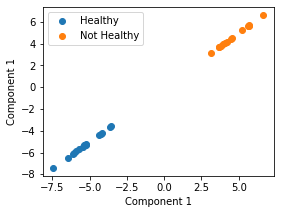

PCA Vectors
Plotting the squared loadings of the latent space transformation vectors
A Larger magnitude indicates larger importance for corresponding feature


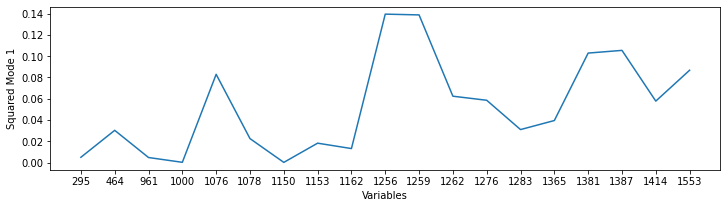

LDA Vectors
Plotting the squared loadings of the latent space transformation vectors
A Larger magnitude indicates larger importance for corresponding feature


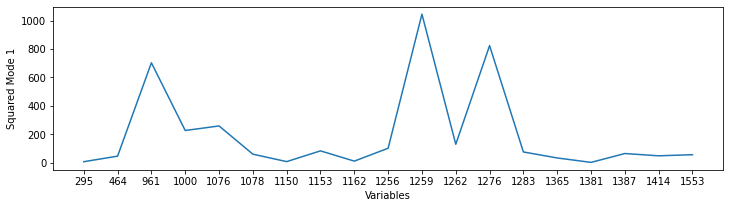

In [2]:
data.normalizeData("autoscale")

pca = adapml_chemometrics.Chemometrics(data.data, "pca", response1D)
lda = adapml_chemometrics.Chemometrics(data.data, "lda", response1D) # Also Predicts

print("PCA Projections");pca.plotProjectionScatterMultiClass(2, labels=["Healthy", "Not Healthy"])
print("LDA Projections");lda.plotProjectionScatterMultiClass(1, labels=["Healthy", "Not Healthy"])

print("PCA Vectors"); pca.plotVectorLoadings(variables, 1)
print("LDA Vectors"); lda.plotVectorLoadings(variables, 1)


# Clustering

K-means, hierarchical, 



          Cluster 1       Cluster 2      Cluster 3
0      NSCLC_A549_1    NSCLC_H522_1  NSCLC_H1703_2
1     NSCLC_H1437_1    NSCLC_H522_2  NSCLC_H1703_1
2     NSCLC_H2228_1     SCLC_86M1_2   NSCLC_A549_2
3     NSCLC_H2228_2     SCLC_86M1_1   NSCLC_H358_2
4     NSCLC_H1437_2     SCLC_16HV_1   NSCLC_H358_1
5     NSCLC_H3122_1     SCLC_16HV_2    NSCLC_PC9_1
6      NSCLC_H322_2    SCLC_DMS79_1    NSCLC_PC9_2
7      NSCLC_H322_1    SCLC_DMS79_2            NaN
8     NSCLC_H3122_2     SCLC_H187_2            NaN
9   NSCLC_HCC4006_1     SCLC_H187_1            NaN
10  NSCLC_HCC4006_2     SCLC_H209_1            NaN
11              NaN     SCLC_H524_1            NaN
12              NaN     SCLC_H209_2            NaN
13              NaN     SCLC_H524_2            NaN
14              NaN      SCLC_H69_1            NaN
15              NaN      SCLC_H82_1            NaN
16              NaN      SCLC_H82_2            NaN
17              NaN      SCLC_H69_2            NaN
18              NaN     SCLC_N4

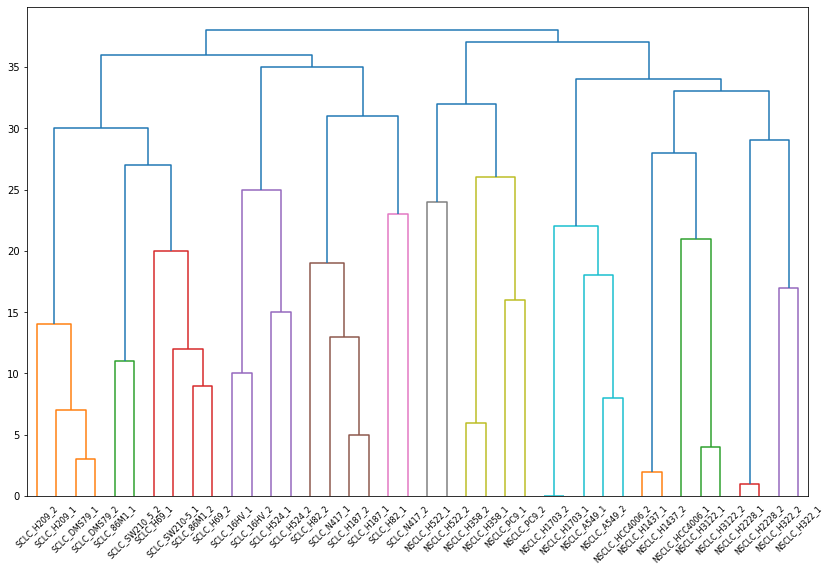

In [3]:
kmeans_cluster = adapml_clustering.Clustering(data.data, 'kmeans', 3)
kmeans_cluster.getClusterResults(samples)

hierarchical_cluster = adapml_clustering.Clustering(data.data, 'hierarchical', 3)
hierarchical_cluster.getClusterResults(samples)
hierarchical_cluster.plot_dendrogram(samples)




# Classification

PLS-DA



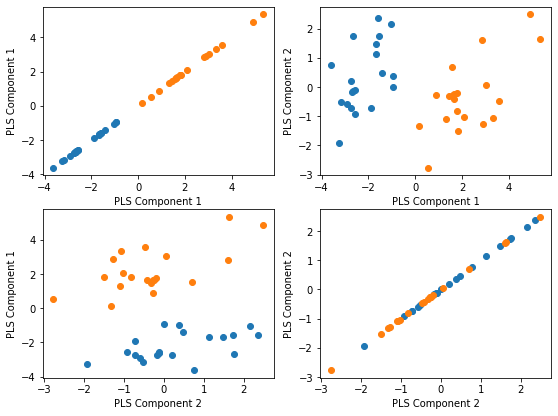

SVM Validated Parameters:  {'kernel': 'linear', 'shrinking': True}


Random Forest Validated Parameters:  {'criterion': 'gini', 'n_estimators': 50}
SVM: R^2=1.0 Q^2=1.0
RF: R^2=1.0 Q^2=1.0


In [4]:
def plotProjectionScatterMultiClass(pc, resp, num_var):
    plt.figure(figsize=(24, 18))

    for i in range(num_var):
        for j in range(num_var):
            plt.subplot(5,5,5*(i) + j + 1)
            for c in range(resp.shape[1]):
                inx = np.where(resp[:,c] == 1)[0]
                tmp = pc[inx,:]
                pc1 = tmp[:,i]
                pc2 = tmp[:,j]
                plt.scatter(pc1, pc2)
            plt.xlabel("PLS Component "+str(i+1))
            plt.ylabel("PLS Component "+str(j+1))

    plt.show()

data = load_data.loadDataPandas(path_to_data)
d = data.to_numpy()
var_index = data.columns.values.tolist()

resp = load_data.getResponseMatrix2D()

norm_trans = pre.StandardScaler().fit(d)
data_norm = norm_trans.transform(d)
#data_norm, norm_trans = pre.mean_center(d)
#In-built preprocessing method - TBD

pls = PLS().fit(data_norm, resp)
pls_trans = pls.transform(data_norm)

plotProjectionScatterMultiClass(pls_trans, resp, 2)


data = adapml_data.DataImport(path_to_data)
svm = adapml_classification.Classification(data.data, response1D, 'svm', .75, kfolds=3)
rnf = adapml_classification.Classification(data.data, response1D, 'randomforest', .75, kfolds=3)


adapml_classification.print_model_stats(svm, "SVM")
adapml_classification.print_model_stats(rnf, "RF")


# Regression

Linear regression 

